# Linear Regression 

## import library

In [2]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D

## load point data for training and testing

In [3]:
fname_data  = 'assignment_07_data.csv'

data        = np.genfromtxt(fname_data, delimiter=',')
num_data    = data.shape[0]
print(data)
print(num_data)

xx          = np.zeros(num_data)
yy          = np.zeros(num_data)
zz          = np.zeros(num_data)

for i in range(num_data):

    xx[i] = data[i,0]
    yy[i] = data[i,1]
    zz[i] = data[i,2]

print(xx)
print(yy)
print(zz)

[[ -8.93733729 -10.73164681 -14.22640408]
 [ -8.06071484 -10.78788051  -6.7101767 ]
 [-10.26082727 -10.09725504 -12.67089679]
 ...
 [  8.87431539  10.16745925  13.25558254]
 [  8.67785323  11.09105394   7.92689264]
 [  9.82222519   9.52188547  10.00816084]]
2500
[ -8.93733729  -8.06071484 -10.26082727 ...   8.87431539   8.67785323
   9.82222519]
[-10.73164681 -10.78788051 -10.09725504 ...  10.16745925  11.09105394
   9.52188547]
[-14.22640408  -6.7101767  -12.67089679 ...  13.25558254   7.92689264
  10.00816084]


## plot the data in the three dimensional space

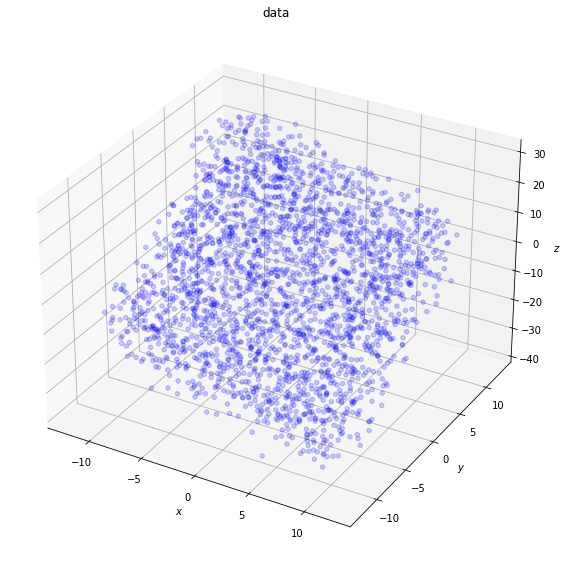

In [4]:
fig = plt.figure(figsize=(12, 8))

ax1 = plt.subplot(111, projection='3d')  # 111: 그래프 크기 222하면 작아짐
plt.title('data')

ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.set_zlabel('$z$')

ax1.scatter(xx, yy, zz, marker='o', color='blue', alpha=0.2)

plt.tight_layout()
plt.show()

## compute the loss function

In [5]:
def compute_residual(theta, x, y, z):
    # ===== FILL UP THE CODE =====
    num_data = x.shape[0]
    
    X = np.empty((0, num_data))
    # axis = 0 : 행 추가
    X = np.append(X, np.array([[1] * num_data]), axis=0)
    X = np.append(X, np.array([x]), axis=0)
    X = np.append(X, np.array([y]), axis=0)          
         
    residual = z - theta.dot(X)
    # ============================
    return residual, num_data

In [6]:
def compute_loss(theta, x, y, z):
    # ===== FILL UP THE CODE =====
    residual, num_data = compute_residual(theta, x, y, z)
    r_squared = np.square(residual)
    r_sum = 0
    for i in range(r_squared.shape[0]):
        r_sum += r_squared[i]
    loss = (1/(2*num_data)) * r_sum
    # ============================
    return loss

## compute the gradient for each model parameter (DO NOT COMPUTE THE GRADIENT FOR EACH MODEL PARAMETER, BUT DO COMPUTE THE GRADIENT OF THE MODEL PARAMTER VECTOR)

In [7]:
def compute_gradient(theta, x, y, z):
    # ===== FILL UP THE CODE =====
    X = np.empty((0, num_data))
    X = np.append(X, np.array([[1] * num_data]), axis=0)
    X = np.append(X, np.array([x]), axis=0)
    X = np.append(X, np.array([y]), axis=0)
    X_T = X.T
    grad = (1/num_data) * X.dot(X_T.dot(theta.T) - z)

    # ============================
    return grad

## gradient descent for each model parameter

In [8]:
num_iteration   = 1000
learning_rate   = 0.01

theta           = np.array((0, 0, 0))
theta_iteration = np.zeros((num_iteration, theta.size))  # 1000 by 3
loss_iteration  = np.zeros(num_iteration)  # 1000

for i in range(num_iteration):
    # ===== FILL UP THE CODE =====
    theta = theta - learning_rate * compute_gradient(theta, xx, yy, zz)
    loss = compute_loss(theta, xx, yy, zz)
    theta_iteration[i, :] = theta
    loss_iteration[i] = loss

    # ============================
    print("iteration = %4d, loss = %5.5f" % (i, loss))
    

iteration =    0, loss = 46.08423
iteration =    1, loss = 25.70661
iteration =    2, loss = 17.25197
iteration =    3, loss = 13.71586
iteration =    4, loss = 12.20934
iteration =    5, loss = 11.54086
iteration =    6, loss = 11.21896
iteration =    7, loss = 11.04093
iteration =    8, loss = 10.92313
iteration =    9, loss = 10.83106
iteration =   10, loss = 10.75047
iteration =   11, loss = 10.67546
iteration =   12, loss = 10.60359
iteration =   13, loss = 10.53382
iteration =   14, loss = 10.46572
iteration =   15, loss = 10.39908
iteration =   16, loss = 10.33383
iteration =   17, loss = 10.26989
iteration =   18, loss = 10.20723
iteration =   19, loss = 10.14582
iteration =   20, loss = 10.08563
iteration =   21, loss = 10.02664
iteration =   22, loss = 9.96883
iteration =   23, loss = 9.91217
iteration =   24, loss = 9.85663
iteration =   25, loss = 9.80220
iteration =   26, loss = 9.74885
iteration =   27, loss = 9.69657
iteration =   28, loss = 9.64532
iteration =   29, los

iteration =  352, loss = 7.12519
iteration =  353, loss = 7.12512
iteration =  354, loss = 7.12504
iteration =  355, loss = 7.12497
iteration =  356, loss = 7.12490
iteration =  357, loss = 7.12483
iteration =  358, loss = 7.12476
iteration =  359, loss = 7.12470
iteration =  360, loss = 7.12463
iteration =  361, loss = 7.12457
iteration =  362, loss = 7.12451
iteration =  363, loss = 7.12445
iteration =  364, loss = 7.12439
iteration =  365, loss = 7.12433
iteration =  366, loss = 7.12427
iteration =  367, loss = 7.12422
iteration =  368, loss = 7.12416
iteration =  369, loss = 7.12411
iteration =  370, loss = 7.12405
iteration =  371, loss = 7.12400
iteration =  372, loss = 7.12395
iteration =  373, loss = 7.12390
iteration =  374, loss = 7.12385
iteration =  375, loss = 7.12380
iteration =  376, loss = 7.12376
iteration =  377, loss = 7.12371
iteration =  378, loss = 7.12367
iteration =  379, loss = 7.12362
iteration =  380, loss = 7.12358
iteration =  381, loss = 7.12354
iteration 

iteration =  756, loss = 7.12144
iteration =  757, loss = 7.12144
iteration =  758, loss = 7.12144
iteration =  759, loss = 7.12144
iteration =  760, loss = 7.12144
iteration =  761, loss = 7.12144
iteration =  762, loss = 7.12144
iteration =  763, loss = 7.12144
iteration =  764, loss = 7.12144
iteration =  765, loss = 7.12144
iteration =  766, loss = 7.12144
iteration =  767, loss = 7.12144
iteration =  768, loss = 7.12144
iteration =  769, loss = 7.12144
iteration =  770, loss = 7.12144
iteration =  771, loss = 7.12144
iteration =  772, loss = 7.12144
iteration =  773, loss = 7.12144
iteration =  774, loss = 7.12144
iteration =  775, loss = 7.12144
iteration =  776, loss = 7.12144
iteration =  777, loss = 7.12144
iteration =  778, loss = 7.12144
iteration =  779, loss = 7.12144
iteration =  780, loss = 7.12144
iteration =  781, loss = 7.12144
iteration =  782, loss = 7.12144
iteration =  783, loss = 7.12144
iteration =  784, loss = 7.12144
iteration =  785, loss = 7.12144
iteration 

In [9]:
f = theta[0] + theta[1] * xx + theta[2] * yy
print(f)

[-15.2534382  -16.20248525 -12.75505532 ...   8.2055347   10.18477997
   6.04535842]


## plot the results

In [10]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))
    plt.title('loss')
    # ===== FILL UP THE CODE =====
    plt.plot(loss_iteration, '-', color='red')

    # ============================
    plt.tight_layout()
    plt.show()

In [11]:
def plot_data(xx, yy, zz):
    
    fig = plt.figure(figsize=(12, 8))
    ax  = plt.subplot(111, projection='3d')
    plt.title('data')
    # ===== FILL UP THE CODE =====
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')
    
    ax.scatter(xx, yy, zz, marker='o', color='blue', alpha=0.2)
    # ============================    
    plt.tight_layout()
    plt.show()

In [12]:

def plot_model_parameter(theta_iteration):

    plt.figure(figsize=(8,6))
    plt.title('model parameter')
    # ===== FILL UP THE CODE =====
    plt.plot(theta_iteration[:, 0], '-', color='red')
    plt.plot(theta_iteration[:, 1], '-', color='green')
    plt.plot(theta_iteration[:, 2], '-', color='blue')
    
    # ============================
    plt.tight_layout()
    plt.show()

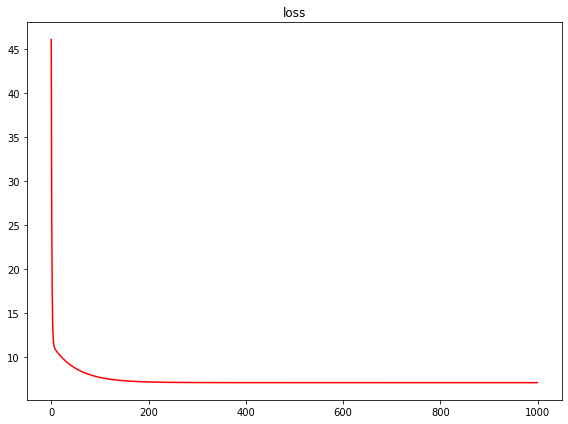

In [13]:
plot_loss_curve(loss_iteration)

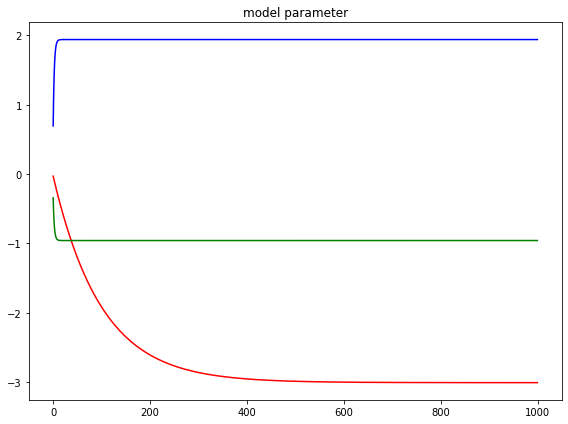

In [14]:
plot_model_parameter(theta_iteration)

In [24]:
# ===== FILL UP THE CODE =====
X0  = np.arange(-10, 10, 0.1)
Y0  = np.arange(-10, 10, 0.1)
XX, YY = np.meshgrid(X0,Y0)

def func_Z(x, y):
    return theta[0] + theta[1] * x + theta[2] * y

ZZ = func_Z(XX, YY)

# ============================
def plot_surface(XX, YY, ZZ, xx, yy, zz):
    fig = plt.figure(figsize=(8,8))
    ax  = fig.add_subplot(111, projection='3d')
    plt.title('regression surface')

    ax  = plt.axes(projection='3d')
    # ===== FILL UP THE CODE =====
    ax.set_xlabel('$xx$')
    ax.set_ylabel('$yy$')
    ax.set_zlabel('$f$')
    
    ax.scatter(xx, yy, zz, marker='o', color='blue', alpha=0.2)
    ax.plot_surface(XX, YY, ZZ, cmap='pink')

    # ============================
    plt.tight_layout()
    plt.show()

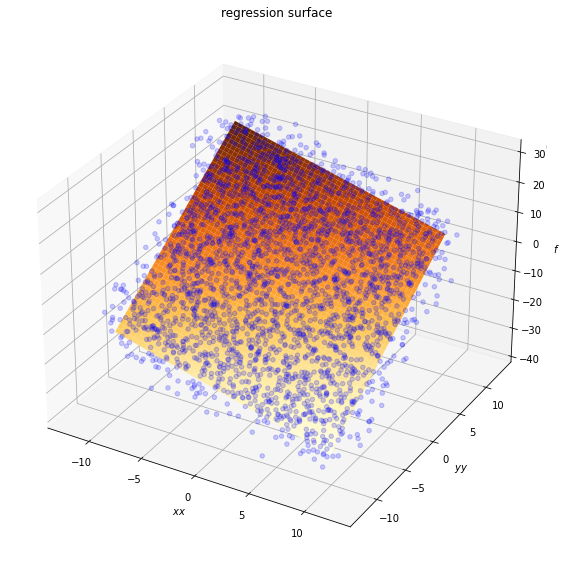

In [25]:
plot_surface(XX, YY, ZZ, xx, yy, zz)

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

# * results

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

### # 01. plot the input data in blue point in 3-dimensional space

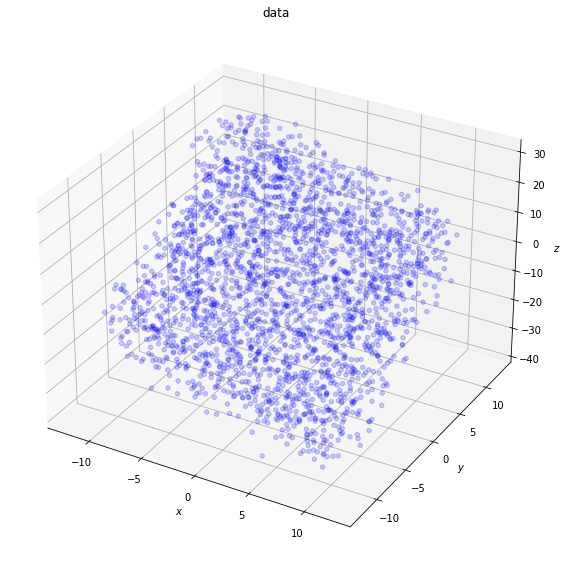

In [178]:
plot_data(xx, yy, zz)

### # 02. plot the values of the model parameters $\theta_0$ in red curve, $\theta_1$ in green curve, and $\theta_2$ in blue curve over the gradient descent iterations

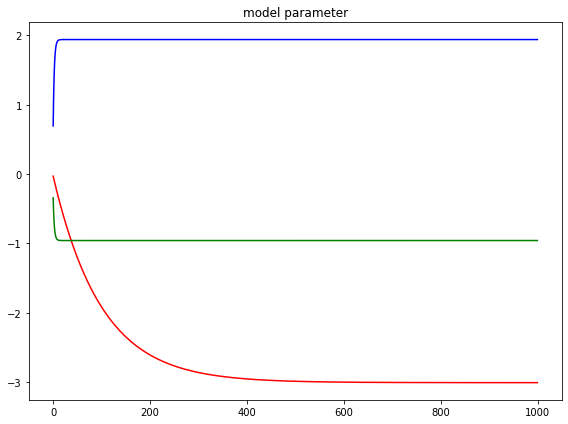

In [179]:
plot_model_parameter(theta_iteration)

### # 03. plot the loss values $\mathcal{L}(\theta)$ in red curve over the gradient descent iterations

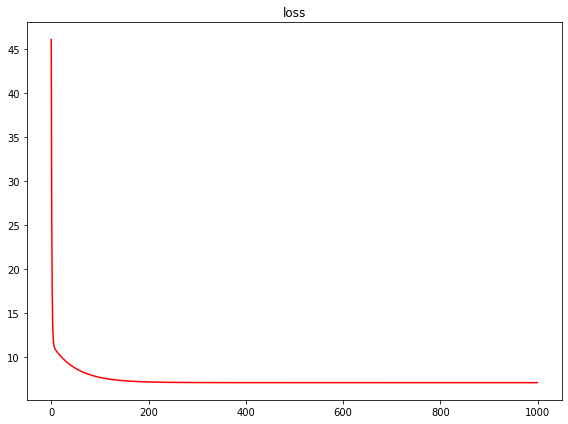

In [180]:
plot_loss_curve(loss_iteration)

### # 04. plot the optimal regression surface $\hat{f}(\theta^*)$ in 3-dimensional space with a given set of data points superimposed

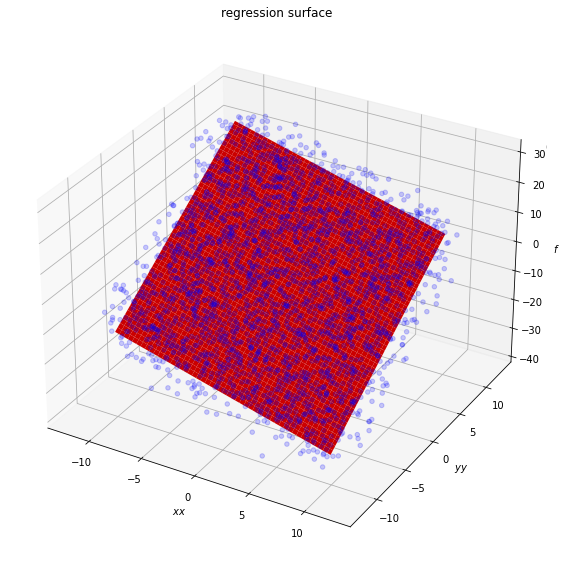

In [181]:
plot_surface(XX, YY, ZZ, xx, yy, zz)